<a href="https://colab.research.google.com/github/Gurneet-Singh/Python-Programs/blob/main/Copy_of_DS11_Project_1_Skyscraper_Building_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS11 Project 1: Skyscraper Building Analysis**

A real estate developer is ready to break ground on a brand new skyscraper that will be the largest in Honolulu, HI. However, they must first recieve approval from city council who are concerned the proposed 250 meter skyscraper would stick out far too much from the existing buildings because of its height. To support their pitch, the real estate developer has hired you to analyze a dataset (https://static.junilearning.com/python_data_science/skyscrapers.csv) of skyscrapers in the US to find precedent for building higher than the surrounding skyline. All heights are given in meters.

Compared to the tallest buildings in other cities, is the proposed skyscraper too tall?

### Part 1: 
Establish precedent by analyzing cities with a similar number of skyscrapers to Honolulu taking note of how tall the tallest building should be relative to others in their skyline. Subset cities with similar skylines into a new DataFrame for further analysis. 

Hint: Standard deviation is a measure of the deviance of the observed values from the mean, in the same units used to measure the data. A **z-score** is the number of standard deviations away from a mean for a data point. The formula to calculate z-scores is `z = (score - mean) / std`.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://static.junilearning.com/python_data_science/skyscrapers.csv")
display(df)

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,purposes.air traffic control tower,purposes.belltower,purposes.bridge,purposes.casino,purposes.commercial,purposes.education,purposes.exhibition,purposes.government,purposes.hospital,purposes.hotel,purposes.industrial,purposes.library,purposes.multiple,purposes.museum,purposes.observation,purposes.office,purposes.other,purposes.religious,purposes.residential,purposes.retail,purposes.serviced apartments,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
0,12,steel,The Illinois,Chicago,1539,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,528,1609.359985,4,1,vision,True,0,True,0
1,62,composite,Chicago Spire,Chicago,1539,US,163,41.889889,-87.614861,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,150,609.599976,1,2,never completed,True,0,True,2007
2,68,composite,Miglin-Beitler Skyneedle,Chicago,1539,US,163,41.881618,-87.634354,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,125,609.489990,1,3,vision,True,0,True,0
3,98,composite,One World Trade Center,New York City,1641,US,163,40.713112,-74.013351,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,94,541.299988,1,4,completed,True,2014,True,2006
4,14269,concrete,Central Park Tower,New York City,1641,US,163,40.766361,-73.980949,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,95,541.020020,3,5,under construction,True,2019,True,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,18633,concrete,Hallets Point 2,New York City,1641,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,0.000000,1,2423,proposed,True,0,True,0
2427,18635,concrete,Hallets Point 3,New York City,1641,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,0.000000,1,2423,proposed,True,0,True,0
2428,18636,concrete,Hallets Point 4,New York City,1641,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,0.000000,1,2423,proposed,True,0,True,0
2429,18637,concrete,Hallets Point 5,New York City,1641,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,0.000000,1,2423,proposed,True,0,True,0


In [ ]:
thing = df[df["location.city"] == "Honolulu"]
display(thing)

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,purposes.air traffic control tower,purposes.belltower,purposes.bridge,purposes.casino,purposes.commercial,purposes.education,purposes.exhibition,purposes.government,purposes.hospital,purposes.hotel,purposes.industrial,purposes.library,purposes.multiple,purposes.museum,purposes.observation,purposes.office,purposes.other,purposes.religious,purposes.residential,purposes.retail,purposes.serviced apartments,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
922,15232,concrete,The Collection,Honolulu,1592,US,163,21.298809,-157.862274,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,43,137.199997,1,923,under construction,True,2016,True,2015
1058,9322,steel,First Hawaiian Center,Honolulu,1592,US,163,21.307871,-157.861557,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,30,130.750000,1,1059,completed,True,1996,True,1993
1083,16359,concrete,Waihonua at Kewalo,Honolulu,1592,US,163,21.293289,-157.848312,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,43,129.800003,1,1084,completed,True,2015,True,2013
1118,9182,concrete,Moana Pacific East Tower,Honolulu,1592,US,163,21.296221,-157.846283,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,46,128.529999,1,1119,completed,True,2008,True,2004
1119,9183,concrete,Moana Pacific West Tower,Honolulu,1592,US,163,21.295811,-157.847168,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,46,128.529999,1,1119,completed,True,2008,True,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,22734,concrete,Kukui Plaza Diamond Ewa Tower,Honolulu,1592,US,163,21.312269,-157.859421,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,33,92.000000,1,1942,completed,True,1976,True,0
1942,22733,concrete,Kukui Plaza Diamond Head Tower,Honolulu,1592,US,163,21.312059,-157.858429,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,33,92.000000,1,1942,completed,True,1976,True,0
2362,16358,concrete,"The Ritz-Carlton Residences, Waikiki Beach, Ea...",Honolulu,1592,US,163,21.282230,-157.829834,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,39,0.000000,1,2361,under construction,True,2017,True,2014
2403,16579,concrete,Halekauwila Place,Honolulu,1592,US,163,21.300489,-157.859024,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,19,0.000000,1,2401,completed,True,2014,True,2013


In [ ]:
e = df["location.city"].value_counts()
e.describe()

count    160.000000
mean      15.187500
std       61.664561
min        1.000000
25%        1.000000
50%        2.000000
75%        8.000000
max      640.000000
Name: location.city, dtype: float64

In [ ]:
filtered = e[(e>15) * (e < 15+61)]
filtered
#display(e2)

Houston              68
San Francisco        68
Seattle              65
Honolulu             61
Los Angeles          55
Las Vegas            54
Atlanta              42
Minneapolis          41
Pittsburgh           39
Philadelphia         38
Boston               38
Sunny Isles Beach    29
Dallas               27
Jersey City          26
San Diego            24
Detroit              21
Miami Beach          21
Austin               21
Phoenix              17
Cleveland            17
Baltimore            17
Milwaukee            17
Indianapolis         16
Name: location.city, dtype: int64

In [ ]:
simCities = df[df["location.city"].isin(filtered.index)]
display(simCities)

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,purposes.air traffic control tower,purposes.belltower,purposes.bridge,purposes.casino,purposes.commercial,purposes.education,purposes.exhibition,purposes.government,purposes.hospital,purposes.hotel,purposes.industrial,purposes.library,purposes.multiple,purposes.museum,purposes.observation,purposes.office,purposes.other,purposes.religious,purposes.residential,purposes.retail,purposes.serviced apartments,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
9,187,composite,Bank of Southwest Tower,Houston,1593,US,163,29.758650,-95.366814,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,82,427.869995,1,10,vision,True,0,True,0
20,19850,steel,Block 142,Houston,1593,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,356.619995,3,21,vision,True,0,True,0
21,9401,concrete,Stratosphere Tower,Las Vegas,1610,US,163,36.147400,-115.155434,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,350.220001,1,22,completed,True,1996,True,1994
24,16192,composite,Comcast Innovation and Technology Center,Philadelphia,1657,US,163,39.955021,-75.170288,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,59,341.679993,2,25,under construction,True,2018,True,2014
25,9686,composite,Wilshire Grand Center,Los Angeles,1611,US,163,34.049900,-118.260017,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,73,334.970001,2,26,structurally topped out,True,2017,True,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,23033,steel,101 Seaport,Boston,1524,US,163,42.351189,-71.045319,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,17,0.000000,1,2412,completed,True,2015,True,0
2412,22515,concrete,Eighty Seven Park,Miami Beach,1622,US,163,25.872150,-80.120872,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,17,0.000000,1,2412,proposed,True,2018,True,2016
2415,19667,concrete,Colony House Condominiums,Atlanta,1509,US,163,33.787991,-84.382149,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,15,0.000000,1,2416,completed,True,1973,True,1972
2418,13104,steel,Jones Hall,Jersey City,1605,US,163,40.722950,-74.062393,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,14,0.000000,1,2418,completed,True,1939,True,0


In [ ]:
var = simCities[simCities["statistics.height"] != 0]
display(var)

,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,purposes.air traffic control tower,purposes.belltower,purposes.bridge,purposes.casino,purposes.commercial,purposes.education,purposes.exhibition,purposes.government,purposes.hospital,purposes.hotel,purposes.industrial,purposes.library,purposes.multiple,purposes.museum,purposes.observation,purposes.office,purposes.other,purposes.religious,purposes.residential,purposes.retail,purposes.serviced apartments,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year
9,187,composite,Bank of Southwest Tower,Houston,1593,US,163,29.758650,-95.366814,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,82,427.869995,1,10,vision,True,0,True,0
20,19850,steel,Block 142,Houston,1593,US,163,0.000000,0.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,356.619995,3,21,vision,True,0,True,0
21,9401,concrete,Stratosphere Tower,Las Vegas,1610,US,163,36.147400,-115.155434,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,350.220001,1,22,completed,True,1996,True,1994
24,16192,composite,Comcast Innovation and Technology Center,Philadelphia,1657,US,163,39.955021,-75.170288,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,59,341.679993,2,25,under construction,True,2018,True,2014
25,9686,composite,Wilshire Grand Center,Los Angeles,1611,US,163,34.049900,-118.260017,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,73,334.970001,2,26,structurally topped out,True,2017,True,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,19676,concrete,"Hilton Milwaukee City Center, West Building",Milwaukee,1634,US,163,43.038540,-87.918480,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,13,55.169998,2,2315,completed,True,2000,True,0
2321,21220,concrete,The Element,Dallas,1554,US,163,32.781052,-96.796066,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,15,53.639999,1,2322,completed,True,2008,True,0
2323,23376,concrete,River Towers A,Minneapolis,1627,US,163,44.983109,-93.266617,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,16,53.299999,1,2324,completed,True,1966,True,1964
2333,23115,steel,FlatironCity,Atlanta,1509,US,163,33.755901,-84.388924,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,11,48.200001,1,2334,completed,True,1897,True,0


In [ ]:
df2 = simCities[["location.city","statistics.height"]]
cities = {}
for i in df2['location.city']:
  cities[i] = df2[df2['location.city'] == i]

In [ ]:
# create dataframe with mean height, standard dev, max height, max z-score for each city
# z = (score - mean) / std
info = pd.DataFrame({'City':[], 'Mean Height':[], 'STD':[], 'Tallest Building':[], 'Max Z-Score':[]})
for i in cities:
  row = {}
  row['City'] = i
  row["Mean Height"] = cities[i]["statistics.height"].mean()
  row["STD"] = cities[i]["statistics.height"].std()
  row["Tallest Building"] = cities[i]["statistics.height"].max()
  row["Max Z-Score"] = ((row["Tallest Building"] - row["Mean Height"])/row["STD"])
  info = info.append(row, ignore_index=True)

info.set_index("City",inplace=True)
display(info)

,Mean Height,STD,Tallest Building,Max Z-Score
City,,,,
Houston,148.268824,76.789643,427.869995,3.641131
Las Vegas,142.530000,55.293763,350.220001,3.756120
Philadelphia,137.099211,74.618745,341.679993,2.741681
Los Angeles,146.453272,60.372833,334.970001,3.122542
Atlanta,136.209286,68.444536,311.799988,2.565445
Cleveland,138.460001,52.090533,288.649994,2.883249
Seattle,135.157078,47.652034,284.380005,3.131512
Dallas,149.935185,73.951318,280.720001,1.768526
San Francisco,133.287501,48.351783,260.000000,2.620638


### Part 2: 
Now prepare an argument to convince the council that the proposed height of 250 meters has precedent in other cities. Support your argument with statistics and a minimum of one plot. Answer in a text cell.

In [ ]:
num = (250 - info.loc["Honolulu", "Mean Height"])/(info.loc["Honolulu", "STD"])
print(num)

5.174080000021977


In [ ]:
info["Max Z-Score"].mean()

2.360077417546454

In [ ]:
with_new = info["Max Z-Score"].append(pd.Series(num))
with_new

Houston              3.641131
Las Vegas            3.756120
Philadelphia         2.741681
Los Angeles          3.122542
Atlanta              2.565445
Cleveland            2.883249
Seattle              3.131512
Dallas               1.768526
San Francisco        2.620638
Pittsburgh           3.035259
Minneapolis          2.425419
Boston               2.084092
Jersey City          1.943905
Detroit              2.668473
Indianapolis         2.791218
Austin               2.625419
Sunny Isles Beach    1.415423
Milwaukee            1.985696
Miami Beach          1.348128
Baltimore            1.606250
San Diego            1.823213
Phoenix              1.303413
Honolulu             0.995027
0                    5.174080
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


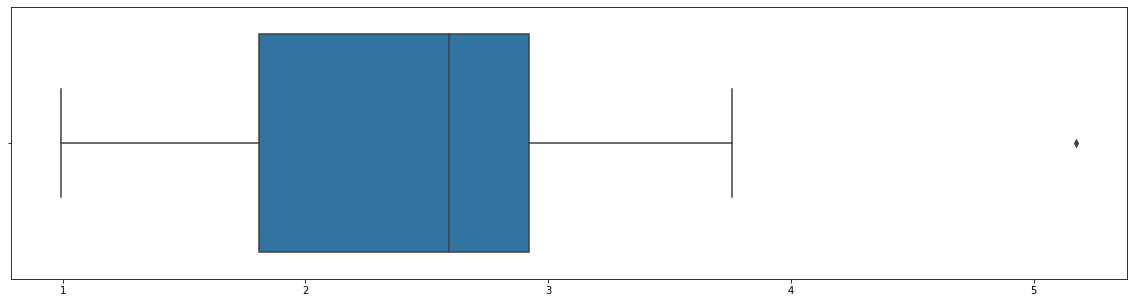

In [ ]:
plt.figure().set_size_inches(20, 5)
#sns.boxplot(x = "Max Z-Score", data = info)
sns.boxplot(with_new)
plt.show()

adding a new building that's 250 meters tall is a terrible idea because if you add that to the Z score, it changes the deviation significantly all the way to over 5 deviations. the average Z score is around 2.65, so it won't make sense. the Z score doesn't align with the precedent.

### Part 3: 
You've successfully convinced the council to approve the height of your building. In exchange for a building permit they're requiring the building to have a functioning office, residential area, and retail space as well as completion within 5 years. This is a difficult task so the developer has asked you to identify towers in the US built after 1970 that fit this criteria to consult with their builder. Output a DataFrame containing the `id`, `name`, and `location` of existing buildings fitting this criteria. Then create a countplot of completion times for skyscrapers in this DataFrame.

In [ ]:
#display(df)
df3 = df[(df["status.current"] == "completed") & (df["status.completed.year"] > 1970)]
df3["time"] = [0 for i in range(len(df3))]
#display(df3)

#create column that shows the difference between completion year and starting year
for i in df3.index:
  #print(i)
  df3.loc[i, "time"] = int(df3.loc[i, "status.completed.year"]) - int(df3.loc[i, "status.started.year"])
#display(df3)

#filter where the total construction time took less than 5 years
lessthanfive = df3[df3["time"] < 5]
#display(lessthanfive)
#filter for office, residential, and retail
orr = lessthanfive[(lessthanfive["purposes.residential"] == True) & (lessthanfive["purposes.retail"] == True) & (lessthanfive["purposes.office"] == True)]
display(orr)
#plot with a countplot

#display the filtered dataframe with the 3 specified columns
filtered = orr.copy()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,material,name,location.city,location.city_id,location.country,location.country id,location.latitude,location.longitude,purposes.abandoned,purposes.air traffic control tower,purposes.belltower,purposes.bridge,purposes.casino,purposes.commercial,purposes.education,purposes.exhibition,purposes.government,purposes.hospital,purposes.hotel,purposes.industrial,purposes.library,purposes.multiple,purposes.museum,purposes.observation,purposes.office,purposes.other,purposes.religious,purposes.residential,purposes.retail,purposes.serviced apartments,purposes.telecommunications,statistics.floors above,statistics.height,statistics.number of purposes,statistics.rank,status.current,status.completed.is completed,status.completed.year,status.started.is started,status.started.year,time
7,169,steel,Willis Tower,Chicago,1539,US,163,41.878868,-87.635948,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,108,442.140015,1,8,completed,True,1974,True,1970,4
10,13227,concrete,432 Park Avenue,New York City,1641,US,163,40.761559,-73.971863,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,85,425.500000,1,11,completed,True,2015,True,2011,4
11,203,concrete,Trump International Hotel & Tower,Chicago,1539,US,163,41.888870,-87.626427,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,98,423.220001,2,12,completed,True,2009,True,2005,4
21,9401,concrete,Stratosphere Tower,Las Vegas,1610,US,163,36.147400,-115.155434,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,0,350.220001,1,22,completed,True,1996,True,1994,2
22,339,steel,Aon Center,Chicago,1539,US,163,41.885159,-87.621452,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,83,346.260010,1,23,completed,True,1973,True,1970,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,15863,steel,Binghamton State Office Building,Binghamton,1520,US,163,42.096169,-75.911407,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,18,0.000000,1,2407,completed,True,1972,True,1970,2
2414,15207,steel,Buffalo General Hospital Building A,Buffalo,1530,US,163,42.900799,-78.866463,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,16,0.000000,1,2415,completed,True,1986,True,1982,4
2415,19667,concrete,Colony House Condominiums,Atlanta,1509,US,163,33.787991,-84.382149,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,15,0.000000,1,2416,completed,True,1973,True,1972,1
2419,18244,steel,Ohio Public Employees Retirement System,Columbus,1545,US,163,39.959309,-82.992310,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,13,0.000000,1,2420,completed,True,2004,True,2000,4
